The purposes of this notebook are:

* Analyze data from california housing dataset with plots and on interactives Leaflet.js maps using Folium.
* Employment of Auto machine learning tool TPOT to optimize the regressor used to predict house prices. In this case the resulting pipeline of TPOT proposes a XGBoost Regressor which is implemented later.

It is possible to interact with the maps of this jupyter notebook using nbviewer in the following link:

http://nbviewer.jupyter.org/github/alvertogit/datascience/blob/master/Geospatial%20analysis%20TPOT%20XGBoost%20california%20housing.ipynb


**Data Set Characteristics:**

Number of Instances: 20640

Number of Attributes: 8 numeric, predictive attributes and the target

Attribute Information:
- MedInc        median income in block
- HouseAge      median house age in block
- AveRooms      average number of rooms
- AveBedrms     average number of bedrooms
- Population    block population
- AveOccup      average house occupancy
- Latitude      house block latitude
- Longitude     house block longitude

Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/
The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census block group. A block group is the smallest geographical unit for which the U.S.

Census Bureau publishes sample data (a block group typically has a population\nof 600 to 3,000 people).

References
- Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,Statistics and Probability Letters, 33 (1997) 291-297

In [1]:
import folium  # interactive map
import matplotlib.pyplot as plt  # plotting
import numpy as np  # linear algebra, arrays
import pandas as pd  # data structures
import seaborn as sns  # statistical data visualization
import xgboost as xgb  # extreme gradient boosting
from sklearn import metrics
from sklearn.datasets import fetch_california_housing  # california housing dataset
from tpot import TPOTRegressor
from xgboost import XGBRegressor

/home/alberto/datascience/.venv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [2]:
dataset = fetch_california_housing()

In [3]:
feature_names = dataset.feature_names
print(feature_names)

['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']


Split data into training (75%) and testing (25%)

In [4]:
from sklearn.model_selection import train_test_split

train_features, test_features, train_labels, test_labels = train_test_split(
    dataset.data, dataset.target, test_size=0.25, random_state=4
)

**Data analysis**

In [5]:
print(train_features.shape)
print(train_labels.shape)

(15480, 8)
(15480,)


In [6]:
print(f"Train labels range: {min(train_labels)} - {max(train_labels)}")

Train labels range: 0.14999 - 5.00001


In [7]:
print(test_features.shape)
print(test_labels.shape)

(5160, 8)
(5160,)


House distribution based on location

<Figure size 1000x1000 with 0 Axes>

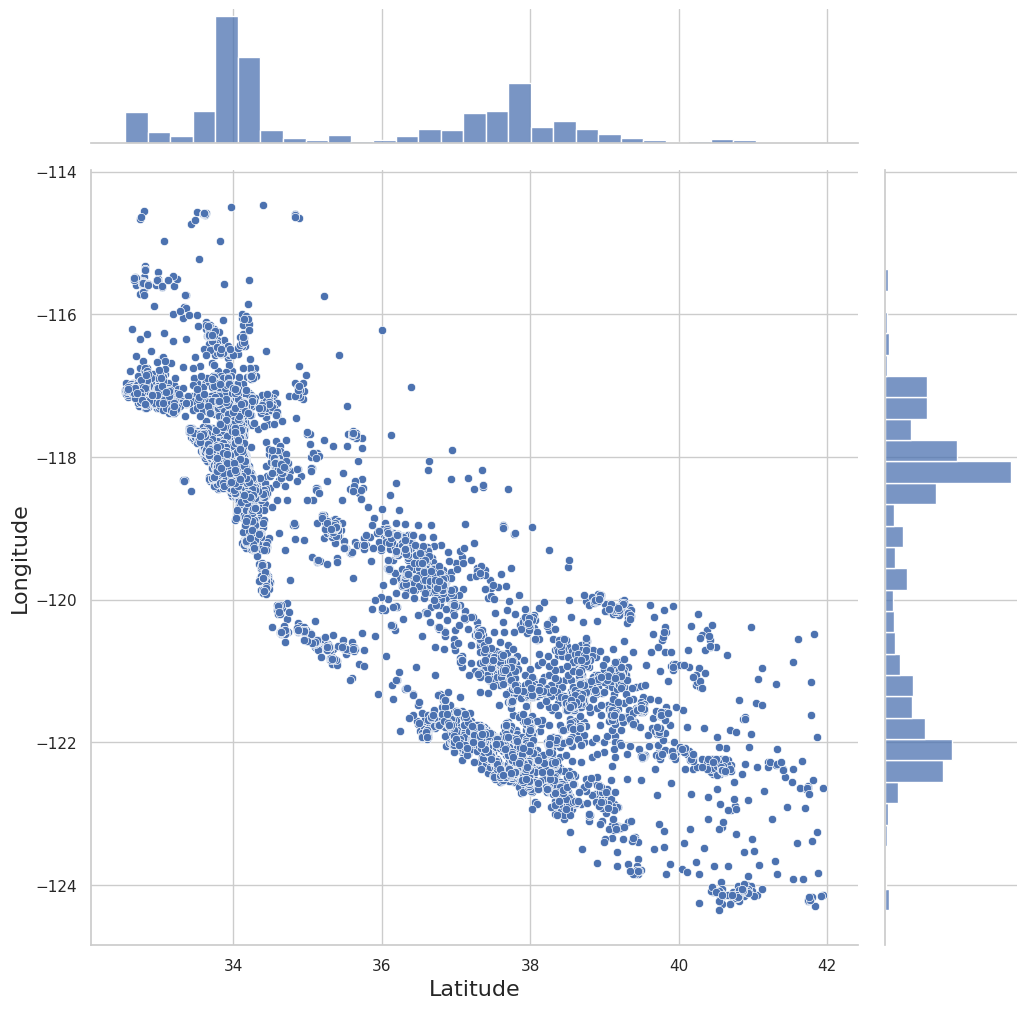

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 10))
sns.jointplot(x=train_features[:, 6], y=train_features[:, 7], height=10)
plt.ylabel("Longitude", fontsize=16)
plt.xlabel("Latitude", fontsize=16)
plt.show()

Interactive heatmap with folium needs some data preparation

In [9]:
heat_data = [[train_features[i][6], train_features[i][7]] for i in range(len(train_features))]

California housing interactive heatmap based on location

In [10]:
from folium.plugins import HeatMap

california_heat_map = folium.Map([37, -120], tiles="OpenStreetMap", zoom_start=6)

HeatMap(heat_data, radius=14).add_to(california_heat_map)

california_heat_map

Housing analysis based on location, price and population (circles radius)

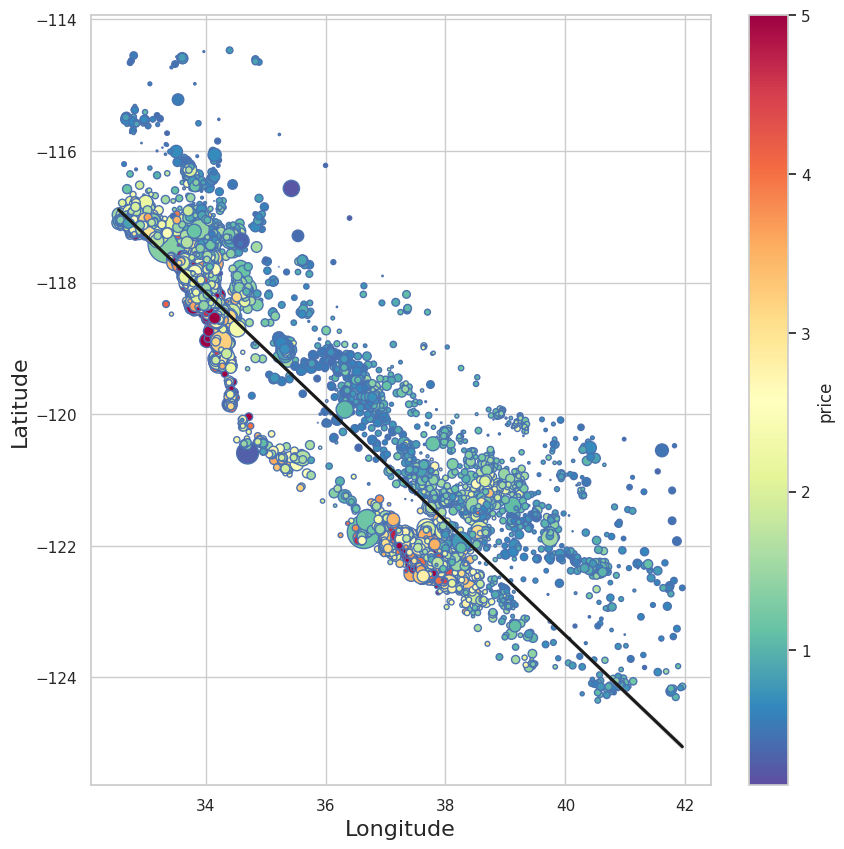

In [11]:
plt.figure(figsize=(10, 10))
points = plt.scatter(
    x=train_features[:, 6],
    y=train_features[:, 7],
    s=train_features[:, 4] / 50,
    c=train_labels,
    cmap="Spectral_r",
    edgecolors="b",
)  # set style options

plt.colorbar(points, label="price")  # add a color bar
sns.regplot(x=train_features[:, 6], y=train_features[:, 7], scatter=False, color=".1")
plt.ylabel("Latitude", fontsize=16)
plt.xlabel("Longitude", fontsize=16)
plt.show()

Interactive housing map for 1000 train samples using circles

Color circles go from blue (lower prices) to red (higher prices)

In [12]:
train_labels_color = pd.cut(
    train_labels, bins=5, labels=["blue", "green", "yellow", "orange", "red"]
)

Circles properties provide additional information for price (color) and population (radius)

In [13]:
california_prices_map = folium.Map([36, -120], tiles="Cartodb Positron", zoom_start=7)

# create feature group
fg = folium.FeatureGroup(name="housing locations")

# drawing 1000 samples
for i in range(1000):
    my_Circle = folium.CircleMarker(
        location=[train_features[i][6], train_features[i][7]],
        radius=train_features[i][4] / 400,
        fill=True,
        color=train_labels_color[i],
        fill_opacity=0.7,
    )
    fg.add_child(my_Circle)

california_prices_map.add_child(fg)

Population and coast proximity affect prices

Employ TPOT for Auto machine learning to optimize pipeline using genetic programming

In [14]:
tpot = TPOTRegressor(
    generations=5, population_size=50, verbosity=2, n_jobs=2
)  # 2 CPU cores, -1 all cores
tpot.fit(train_features, train_labels)

Optimization Progress:   0%|          | 0/300 [00:00<?, ?pipeline/s]

/home/alberto/datascience/.venv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")
/home/alberto/datascience/.venv/lib/python3.10/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")



Generation 1 - Current best internal CV score: -0.25856764417451716

Generation 2 - Current best internal CV score: -0.24819205229120125

Generation 3 - Current best internal CV score: -0.24819205229120125

Generation 4 - Current best internal CV score: -0.22078056629464576

Generation 5 - Current best internal CV score: -0.22078056629464576

Best pipeline: XGBRegressor(input_matrix, learning_rate=0.1, max_depth=8, min_child_weight=13, n_estimators=100, n_jobs=1, objective=reg:squarederror, subsample=0.7500000000000001, verbosity=0)


TPOTRegressor(generations=5, n_jobs=2, population_size=50, verbosity=2)

Calculate pipeline score

In [15]:
print(tpot.score(test_features, test_labels))

-0.2185167034899836


It is negative because for regression scoring tpot uses 'neg_mean_squared_error'

Export tpot pipeline to a file

In [16]:
tpot.export("tpot_california_pipeline.py")

The exported pipeline proposes a XGBoost Regressor model:

```python
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor

# NOTE: Make sure that the class is labeled 'target' in the data file
tpot_data = pd.read_csv('PATH/TO/DATA/FILE', sep='COLUMN_SEPARATOR', dtype=np.float64)
features = tpot_data.drop('target', axis=1).values
training_features, testing_features, training_target, testing_target = \
            train_test_split(features, tpot_data['target'].values, random_state=None)

# Average CV score on the training set was:-0.22078056629464576
exported_pipeline = XGBRegressor(learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.8)
```

Wrap train and test features into dataframes to have available feature column names

In [17]:
train_features_df = pd.DataFrame(train_features, columns=feature_names)
test_features_df = pd.DataFrame(test_features, columns=feature_names)

Define and fit XGBRegressor model

In [18]:
model = XGBRegressor(
    learning_rate=0.1, max_depth=9, min_child_weight=7, n_estimators=100, nthread=1, subsample=0.8
)
model.fit(train_features_df, train_labels)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=9, max_leaves=None,
             min_child_weight=7, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None, nthread=1,
             num_parallel_tree=None, ...)

Get predictions for test dataset

In [19]:
predictions = model.predict(test_features_df)

In [20]:
predictions[:10]

array([1.6175631 , 2.9311335 , 1.2008175 , 1.1233522 , 3.663012  ,
       0.78502804, 2.4117997 , 4.240082  , 1.4185116 , 1.1282518 ],
      dtype=float32)

In [21]:
test_labels[:10]

array([1.752  , 3.147  , 0.9    , 1.231  , 3.509  , 0.873  , 2.127  ,
       5.00001, 1.375  , 1.107  ])

Calculate model mean squared error for test dataset

In [22]:
np.sqrt(metrics.mean_squared_error(predictions, test_labels))

0.4613561871123809

Plot model features importance

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

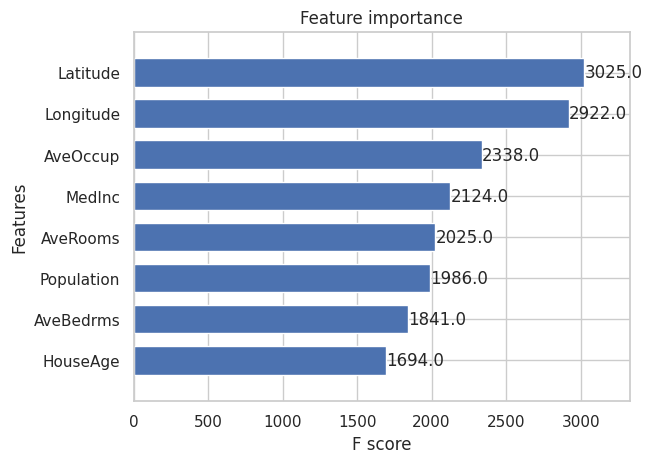

In [23]:
xgb.plot_importance(model, height=0.7)

It shows that location coordinates of houses are the most relevant features to estimate prices